In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import math

In [7]:
df = pd.read_csv('E:\sloar panels\project-sunroof-county.csv',encoding='ISO-8859-1')

In [8]:
df.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,NaN,NaN,32.551561,32.551527,-116.919812,-116.920318,32.551544,-116.920065,1299.65,2,...,4.745559e+03,7.692078e+03,0.000000e+00,0.000000e+00,0.000000e+00,5209.464685,1.243764e+04,"[[0,2]]",0.000000e+00,0
1,Acadia Parish,Louisiana,30.480512,30.150698,-92.144065,-92.598066,30.256188,-92.331117,1073.55,28,...,3.663058e+04,1.084676e+05,7.170529e+04,9.811702e+04,3.557943e+06,18455.689746,3.872863e+06,"[[0,5],[5,2],[10,5],[15,3],[20,2],[25,1],[40,1...",2.619893e+03,0
2,Ada County,Idaho,43.776411,43.297448,-115.998789,-116.512796,43.614095,-116.308027,1161.95,127097,...,4.510353e+07,7.928349e+08,3.305852e+08,5.466880e+08,9.644616e+08,12656.146387,2.679673e+09,"[[0,21743],[5,46490],[10,31665],[15,13302],[20...",7.125475e+05,333
3,Adams County,Colorado,40.000318,39.738577,-104.310944,-105.052979,39.879721,-104.923252,1250.35,103951,...,1.402637e+07,5.047118e+08,2.529707e+08,2.968862e+08,1.160027e+09,8740.831396,2.228622e+09,"[[0,37831],[5,40975],[10,12770],[15,4216],[20,...",1.356972e+06,2218
4,Aiken County,South Carolina,33.853912,33.271435,-81.276617,-82.007226,33.517511,-81.801685,1099.05,45852,...,6.609113e+07,2.521735e+08,1.524194e+08,1.672472e+08,2.772775e+08,12029.735608,9.152087e+08,"[[0,8380],[5,15615],[10,11092],[15,5170],[20,2...",5.372701e+05,84


In [9]:
df.shape


(910, 31)

In [11]:
df.isnull().sum()

region_name                             1
state_name                              1
lat_max                                 0
lat_min                                 0
lng_max                                 0
lng_min                                 0
lat_avg                                 0
lng_avg                                 0
yearly_sunlight_kwh_kw_threshold_avg    0
count_qualified                         0
percent_covered                         0
percent_qualified                       0
number_of_panels_n                      0
number_of_panels_s                      0
number_of_panels_e                      0
number_of_panels_w                      0
number_of_panels_f                      0
number_of_panels_median                 2
number_of_panels_total                  2
kw_median                               2
kw_total                                2
yearly_sunlight_kwh_n                   0
yearly_sunlight_kwh_s                   0
yearly_sunlight_kwh_e             

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   region_name                           909 non-null    object 
 1   state_name                            909 non-null    object 
 2   lat_max                               910 non-null    float64
 3   lat_min                               910 non-null    float64
 4   lng_max                               910 non-null    float64
 5   lng_min                               910 non-null    float64
 6   lat_avg                               910 non-null    float64
 7   lng_avg                               910 non-null    float64
 8   yearly_sunlight_kwh_kw_threshold_avg  910 non-null    float64
 9   count_qualified                       910 non-null    int64  
 10  percent_covered                       910 non-null    float64
 11  percent_qualified  

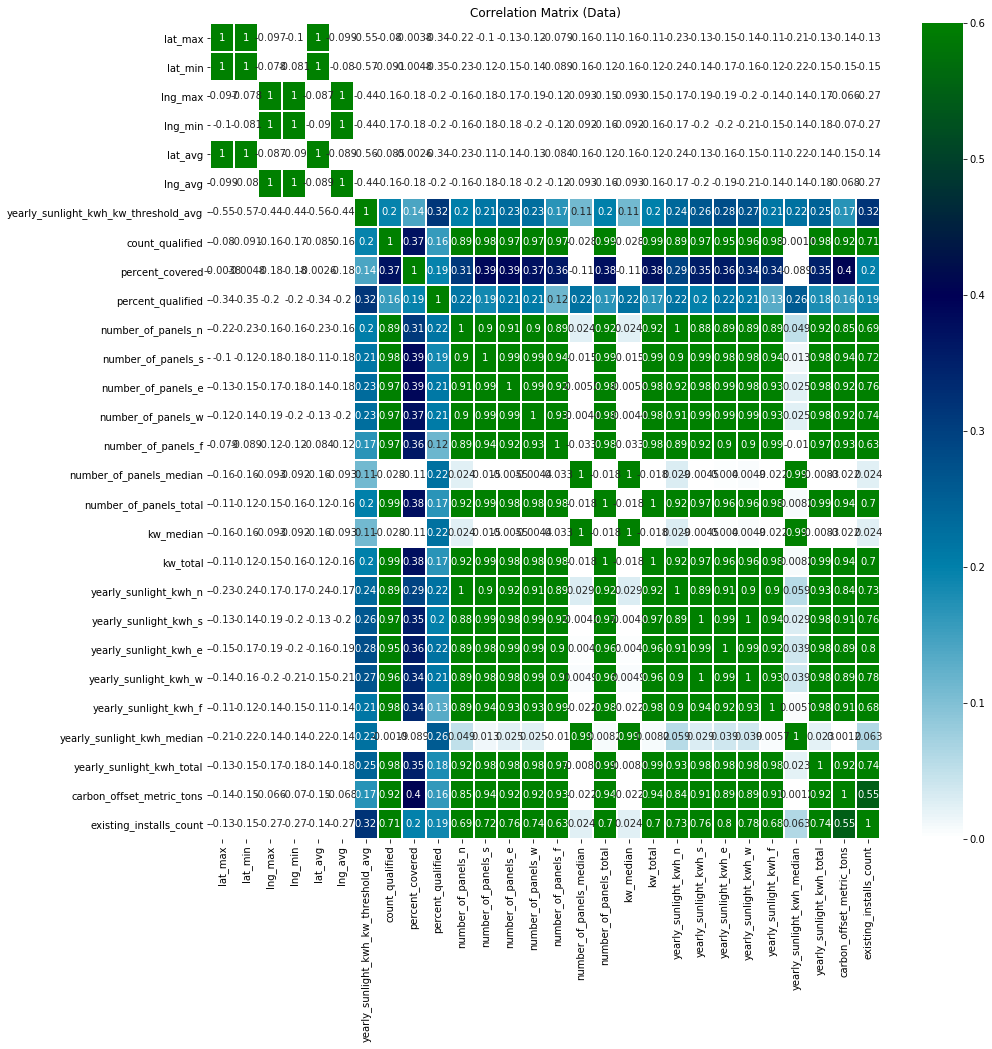

In [13]:
a = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(a, annot=True, annot_kws={"size": 10}, linewidths=1, vmin=0, vmax=0.6, cmap='ocean_r')
plt.title("Correlation Matrix (Data)")
plt.show()

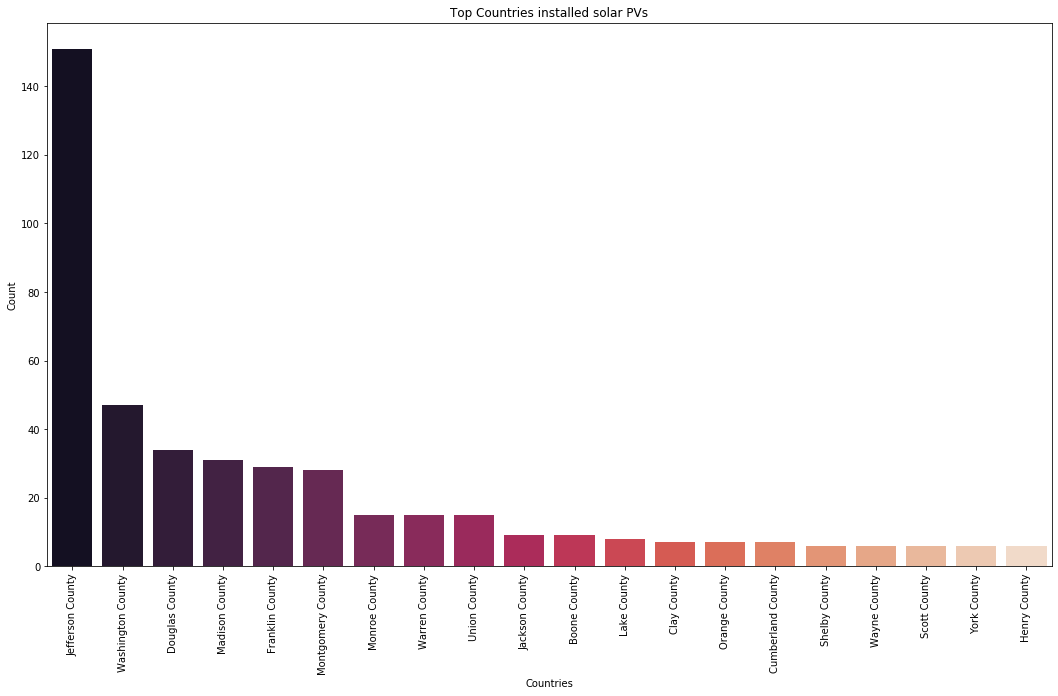

In [18]:
plt.subplots(figsize=(18,10))
sns.barplot(df['region_name'].value_counts()[:20].index,df['existing_installs_count'].value_counts()[:20].values,palette='rocket')
plt.title('Top Countries installed solar PVs')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

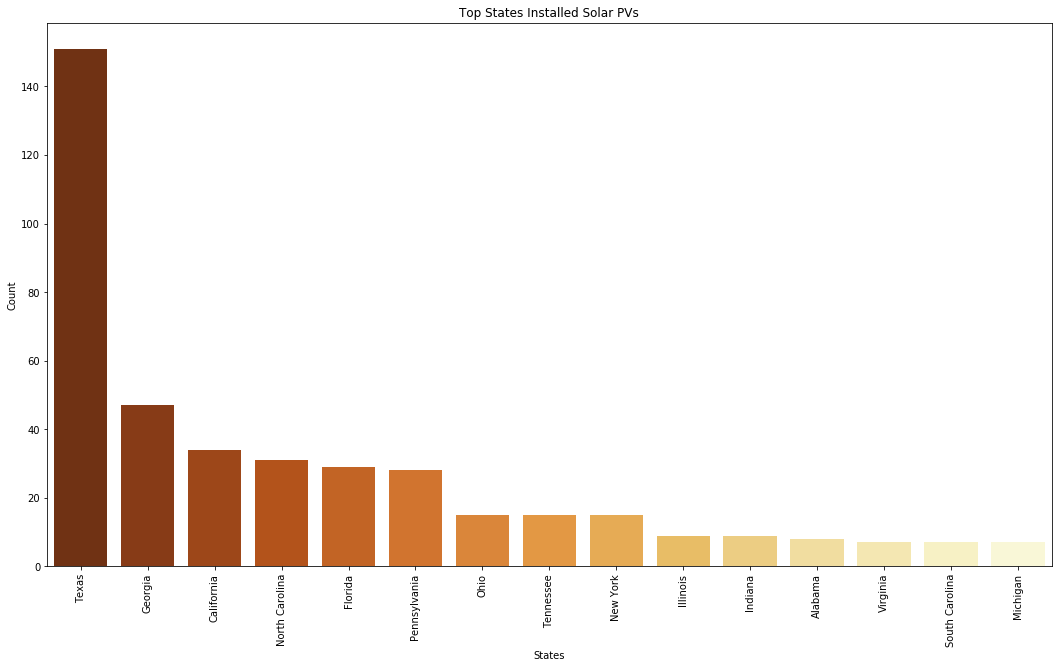

In [21]:
plt.subplots(figsize=(18,10))
sns.barplot(df['state_name'].value_counts()[:15].index,df['existing_installs_count'].value_counts()[:15].values,palette='YlOrBr_r')
plt.title('Top States Installed Solar PVs')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

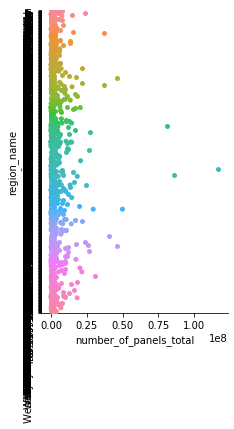

In [46]:
sns.catplot(x="number_of_panels_total",y="region_name",data = df)
plt.yticks(rotation = 90)
plt.show()